In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")

In [ ]:
# Getting output from LLM
def function1(input):
    response = llm.invoke(input).content
    return response

In [4]:
# Converting output in Upper case
def function2(input):
    response = input.upper()
    return response

In [6]:
from langgraph.graph import Graph
workflow = Graph()

In [7]:
workflow.add_node("llm", function1)
workflow.add_node("upper", function2)

workflow.add_edge("llm", "upper")

workflow.set_entry_point("llm")
workflow.set_finish_point("upper")

In [8]:
app = workflow.compile()

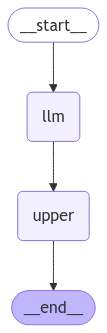

In [9]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [10]:
app.invoke("who is the captain of Australian mens cricket team at 2015")

'MICHAEL CLARKE'

In [12]:
input = "who is the captain of Australian mens cricket team at 2015"

for output in app.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
Michael Clarke


here is output from upper
_______
MICHAEL CLARKE




Adding token counter function inside graph workflow

In [17]:
def function3(input):
    token=input.split()
    token_number=len(token)
    token_number=f"total token number is {token_number}"
    return token_number

In [18]:
workflow2=Graph()
workflow2.add_node("llm",function1)
workflow2.add_node("upper", function2)
workflow2.add_node("token_counter",function3)
workflow2.add_edge("llm","upper")
workflow2.add_edge("upper","token_counter")
workflow2.set_entry_point("llm")
workflow2.set_finish_point("token_counter")
app2=workflow2.compile()

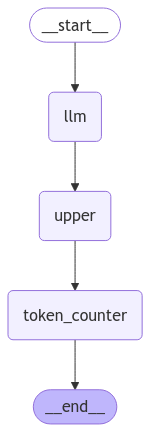

In [19]:
from IPython.display import Image, display
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [20]:
input = "who is the captain of Australian mens cricket team at 2015"

for output in app2.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
Michael Clarke


here is output from upper
_______
MICHAEL CLARKE


here is output from token_counter
_______
total token number is 2


